In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score,recall_score

import datetime, warnings, scipy 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/temismollz/ipynb files/Exercises'

In [3]:
df = pd.read_csv('PRAtechnicaltest.csv')
df.shape

(3470, 38)

In [4]:
# Rename the columns
df.rename(columns={'c_accountid': 'DebtID','c_entity': 'VendorName',}, inplace=True)

In [5]:
df.dtypes

DebtID                               int64
d_observation_date                  object
VendorName                          object
 n_account_balance                  object
d_acq_date                          object
n_active_num                         int64
n_tel_notel                          int64
d_last_payment_date                 object
n_pay_30                           float64
n_pay_60                           float64
n_pay_90                           float64
n_pay_180                          float64
n_pay_count_30                       int64
n_pay_count_60                       int64
n_pay_count_90                       int64
n_pay_count_180                      int64
c_type_of_portfolio_rap             object
d_last_sms_date                     object
n_sms_count                          int64
d_rpc_date                          object
n_deceased                           int64
n_bancrupcy_failed_lawsuits_etc      int64
d_lawsuit_date                      object
d_payment_o

## Exploratory Data Analysis 

In [6]:
df['Target'].value_counts()

0    2776
1     694
Name: Target, dtype: int64

There is an imbalance data. The number of class are not equal so the majority class will affect the results of the classification

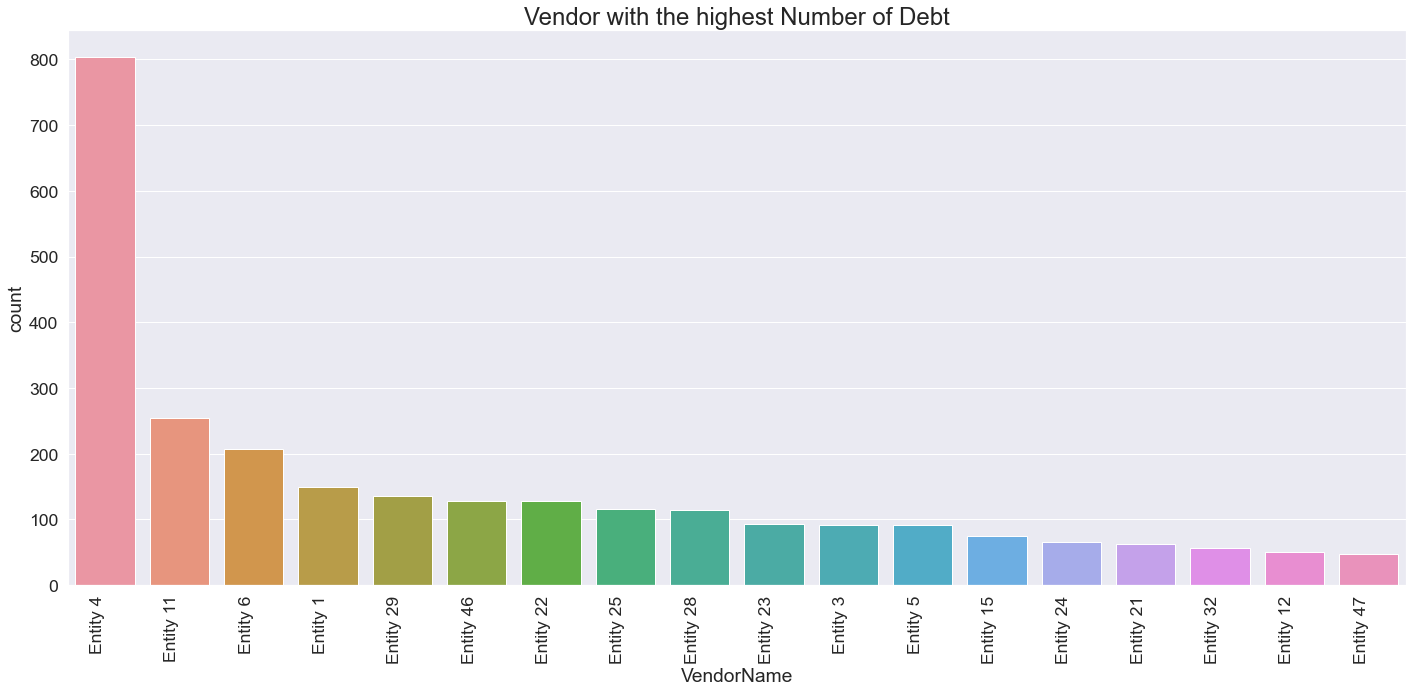

In [7]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['VendorName'], data=df, order=df['VendorName'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Vendor with the highest Number of Debt', fontsize=24)
plt.tight_layout()
plt.show()

Highest number of people that collected loan 

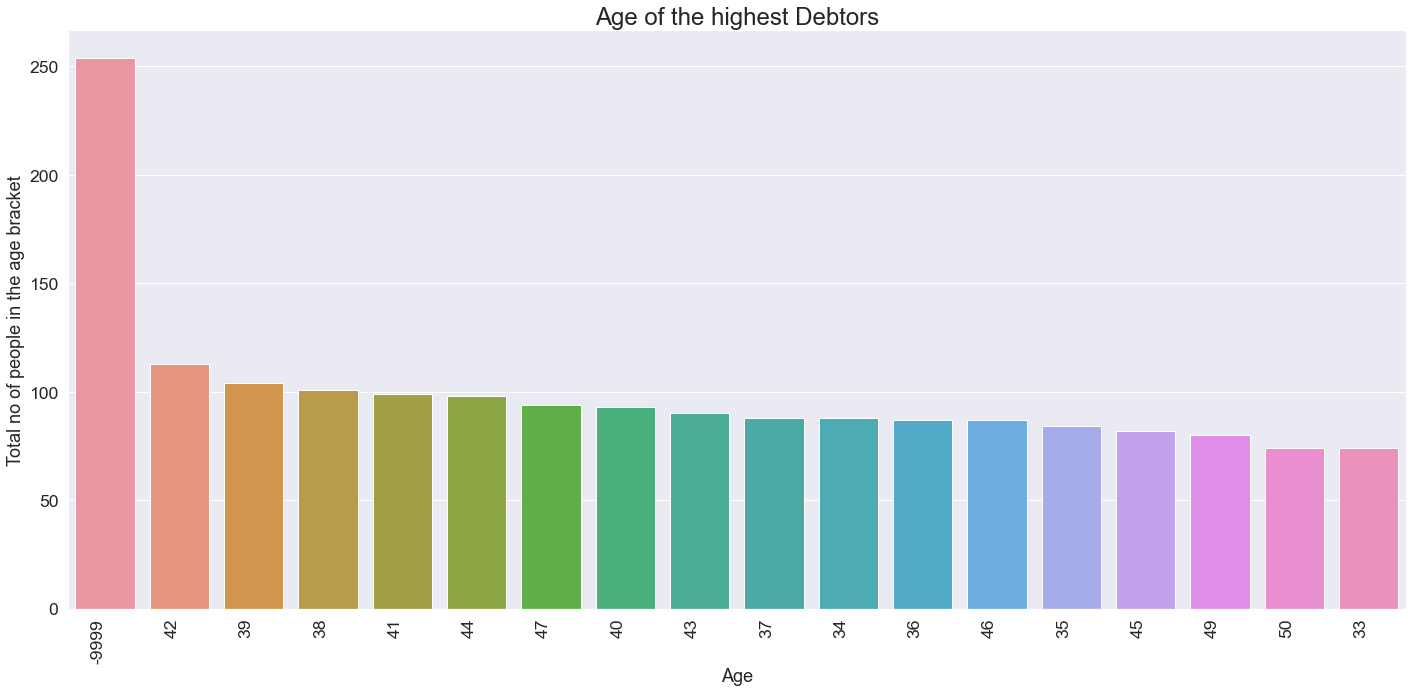

In [8]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['age'], data=df, order=df['age'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Age of the highest Debtors', fontsize=24)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total no of people in the age bracket', fontsize=18)
plt.tight_layout()
plt.show()

Most of the debtors are between the ages of 33-50

In [9]:
df['gender'].value_counts()

M    1717
K    1499
N     254
Name: gender, dtype: int64

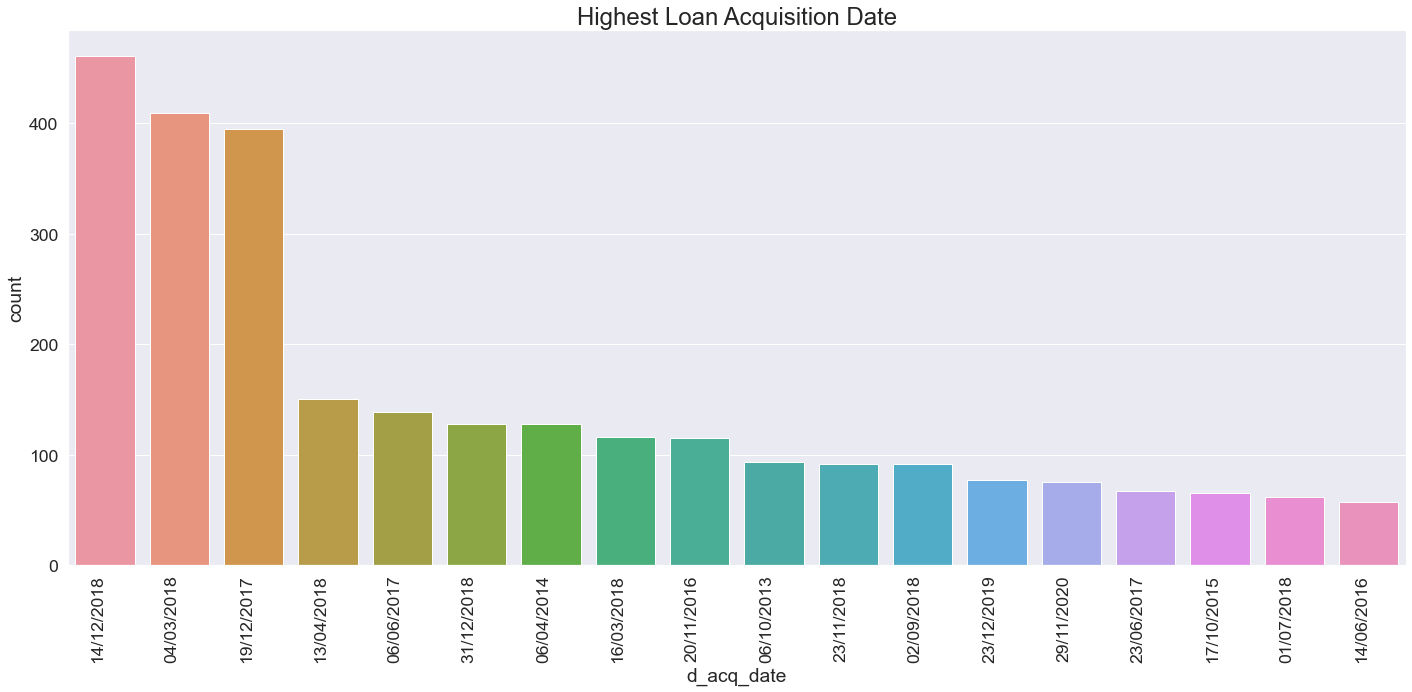

In [10]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['d_acq_date'], data=df, order=df['d_acq_date'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Highest Loan Acquisition Date', fontsize=24)
plt.tight_layout()
plt.show()

Most of the debt were acquired on the 14-Dec-2018

In [11]:
df['d_last_payment_date'] = pd.to_datetime(df['d_last_payment_date'])
df['d_last_sms_date'] = pd.to_datetime(df['d_last_sms_date'])
df['d_rpc_date'] = pd.to_datetime(df['d_rpc_date'])
df['d_lawsuit_date'] = pd.to_datetime(df['d_lawsuit_date'])
df['d_payment_order_date'] = pd.to_datetime(df['d_payment_order_date'])
df['d_title_day'] = pd.to_datetime(df['d_title_day'])
df['d_execution_date'] = pd.to_datetime(df['d_execution_date'])
df['d_unsuccesfull_exe_date'] = pd.to_datetime(df['d_unsuccesfull_exe_date'])
df['d_inactivation_date'] = pd.to_datetime(df['d_inactivation_date'])
df['d_last_broken_date'] = pd.to_datetime(df['d_last_broken_date'])
df['d_last_inbound_date'] = pd.to_datetime(df['d_last_inbound_date'])

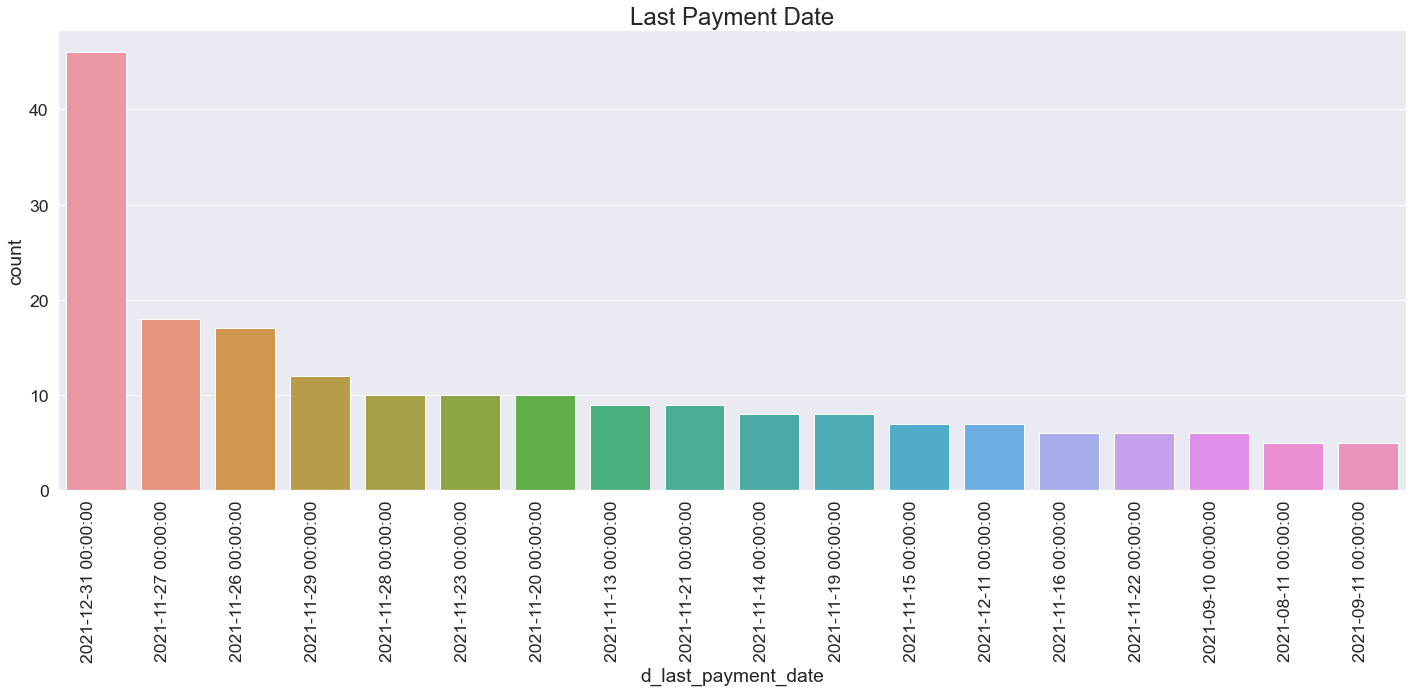

In [12]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['d_last_payment_date'], data=df, order=df['d_last_payment_date'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Last Payment Date', fontsize=24)
plt.tight_layout()
plt.show()

In [13]:
df.n_pay_count_30.value_counts(normalize=True)

0    0.985879
1    0.014121
Name: n_pay_count_30, dtype: float64

In [14]:
df['n_pay_count_30'].value_counts()

0    3421
1      49
Name: n_pay_count_30, dtype: int64

Only 1.41% of people made payments in the last 30 days - 49 people 

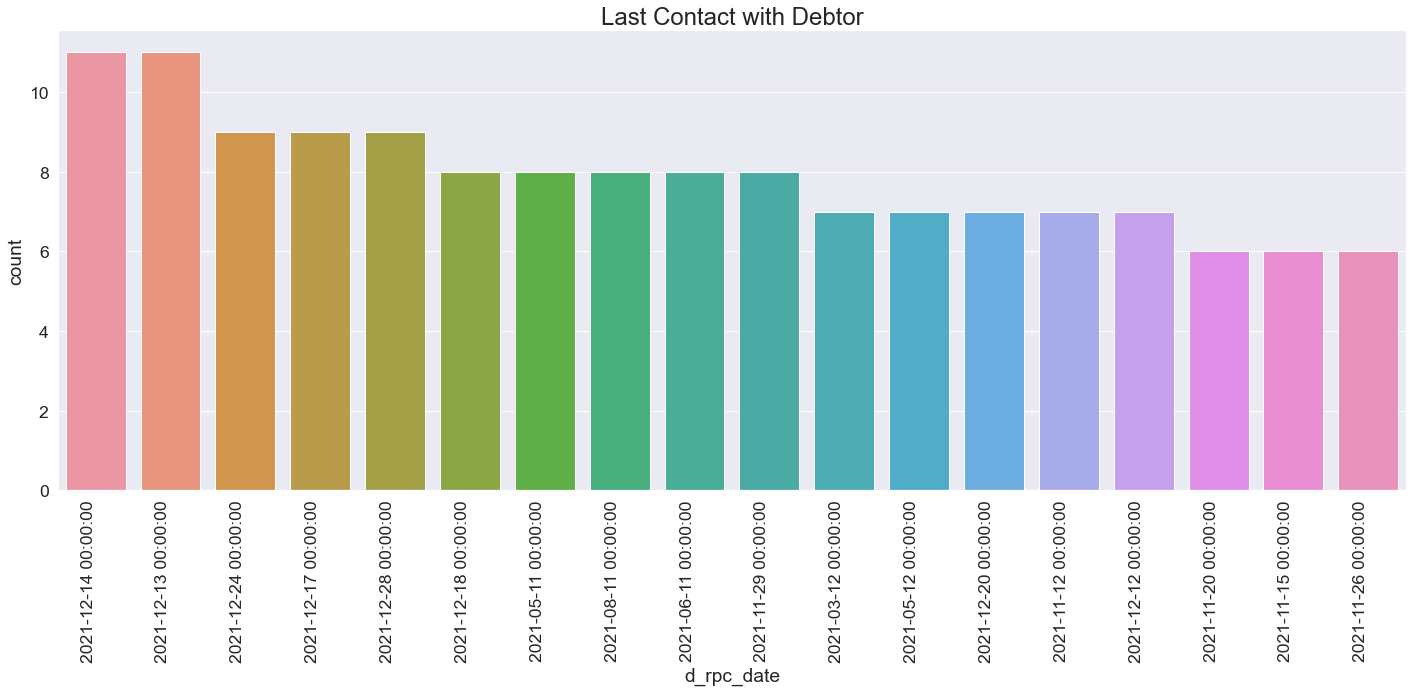

In [15]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['d_rpc_date'], data=df, order=df['d_rpc_date'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Last Contact with Debtor', fontsize=24)
plt.tight_layout()
plt.show()

Majority of the debtors paid made some kind of payment between November - December 2021

In [16]:
df['c_subregion'].value_counts()

Subregion_28    147
Subregion_48     89
Subregion_21     68
Subregion_43     63
Subregion_3      58
               ... 
Subregion_9      10
Subregion_13     10
Subregion_19     10
Subregion_33      9
Subregion_39      9
Name: c_subregion, Length: 65, dtype: int64

In [17]:
(df['c_subregion']=='NULL').sum()

0

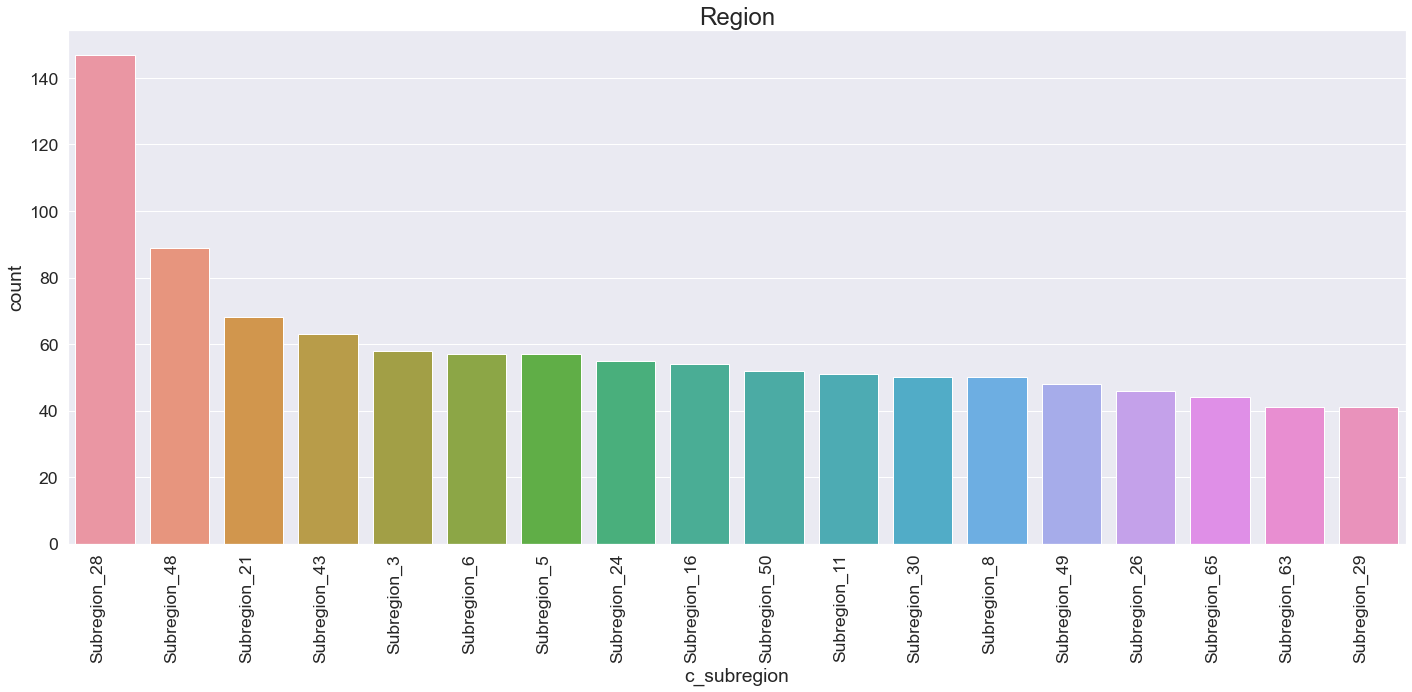

In [18]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['c_subregion'], data=df, order=df['c_subregion'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Region', fontsize=24)
plt.tight_layout()
plt.show()

In [19]:
df.gender.value_counts(normalize=True)

M    0.494813
K    0.431988
N    0.073199
Name: gender, dtype: float64

In [20]:
df['c_type_of_portfolio_rap'].value_counts()

banking      2061
telecom       992
utilities     417
Name: c_type_of_portfolio_rap, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

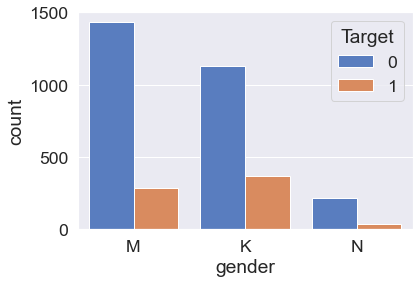

In [21]:
sns.countplot(x='gender', data=df,hue="Target", palette="muted")  
# Checking the number of counts of defaulters in Target by gender

49% of the debtors are also male 

## Feature Selection-Limit the Feature Space

The dataset has 38 features. we need to find out which of them are relevant. 

1. Eliminate feature that have more than 30% missing values.
2. Eliminate features that are unintuitive based on subjective judgement.
3. Eliminate features with low correlation with the predicted variable

#### Features elimination by significant missing values


In [22]:
# Missing values
df.isna().any()[lambda x: x]

d_last_payment_date        True
d_last_sms_date            True
d_rpc_date                 True
d_lawsuit_date             True
d_payment_order_date       True
d_title_day                True
d_execution_date           True
d_unsuccesfull_exe_date    True
d_maturity_date            True
d_inactivation_date        True
d_last_broken_date         True
c_subregion                True
d_last_inbound_date        True
dtype: bool

In [23]:
missing_values = df.isnull().mean().sort_values(ascending=False)

missing_values.head(13)

d_last_inbound_date        0.968300
d_rpc_date                 0.935735
d_last_payment_date        0.909798
d_inactivation_date        0.894813
d_last_broken_date         0.845245
d_last_sms_date            0.617867
d_unsuccesfull_exe_date    0.529683
c_subregion                0.350720
d_payment_order_date       0.281556
d_execution_date           0.273775
d_title_day                0.236599
d_lawsuit_date             0.208069
d_maturity_date            0.046686
dtype: float64

In [24]:
drop_list = sorted(list(missing_values[missing_values > 0.3].index))
print(drop_list)

['c_subregion', 'd_inactivation_date', 'd_last_broken_date', 'd_last_inbound_date', 'd_last_payment_date', 'd_last_sms_date', 'd_rpc_date', 'd_unsuccesfull_exe_date']


In [25]:
df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(3470, 30)

The features have been reduced by 8. 

#### Features elimination based on the intutiveness
In order to filter the features further we check the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement.

In [26]:
df.columns

Index(['DebtID', 'd_observation_date', 'VendorName', ' n_account_balance ',
       'd_acq_date', 'n_active_num', 'n_tel_notel', 'n_pay_30', 'n_pay_60',
       'n_pay_90', 'n_pay_180', 'n_pay_count_30', 'n_pay_count_60',
       'n_pay_count_90', 'n_pay_count_180', 'c_type_of_portfolio_rap',
       'n_sms_count', 'n_deceased', 'n_bancrupcy_failed_lawsuits_etc',
       'd_lawsuit_date', 'd_payment_order_date', 'd_title_day',
       'd_execution_date', 'd_maturity_date', 'n_in_dialler_obs_day',
       'n_arrangement_active', 'gender', 'age', 'Target_Amount', 'Target'],
      dtype='object')

In [27]:
ndf =['DebtID', 'VendorName', 'n_account_balance', 'd_acq_date', 'n_active_num','n_pay_30',
     'n_pay_60','n_pay_90','n_pay_180','n_pay_count_30', 'n_pay_count_60',
       'n_pay_count_90', 'n_pay_count_180', 'c_type_of_portfolio_rap',
       'n_sms_count','d_payment_order_date', 'd_title_day',
       'd_execution_date', 'd_maturity_date','gender', 'age', 'Target_Amount', 'Target']          

In [28]:
len(ndf)

23

In [29]:
drop_list = [col for col in df.columns if col not in ndf]

df.drop(labels=drop_list, axis=1, inplace=True)

df.shape

(3470, 22)

#### Features elimination based on the correlation


<AxesSubplot:title={'center':'Correlation with Default'}>

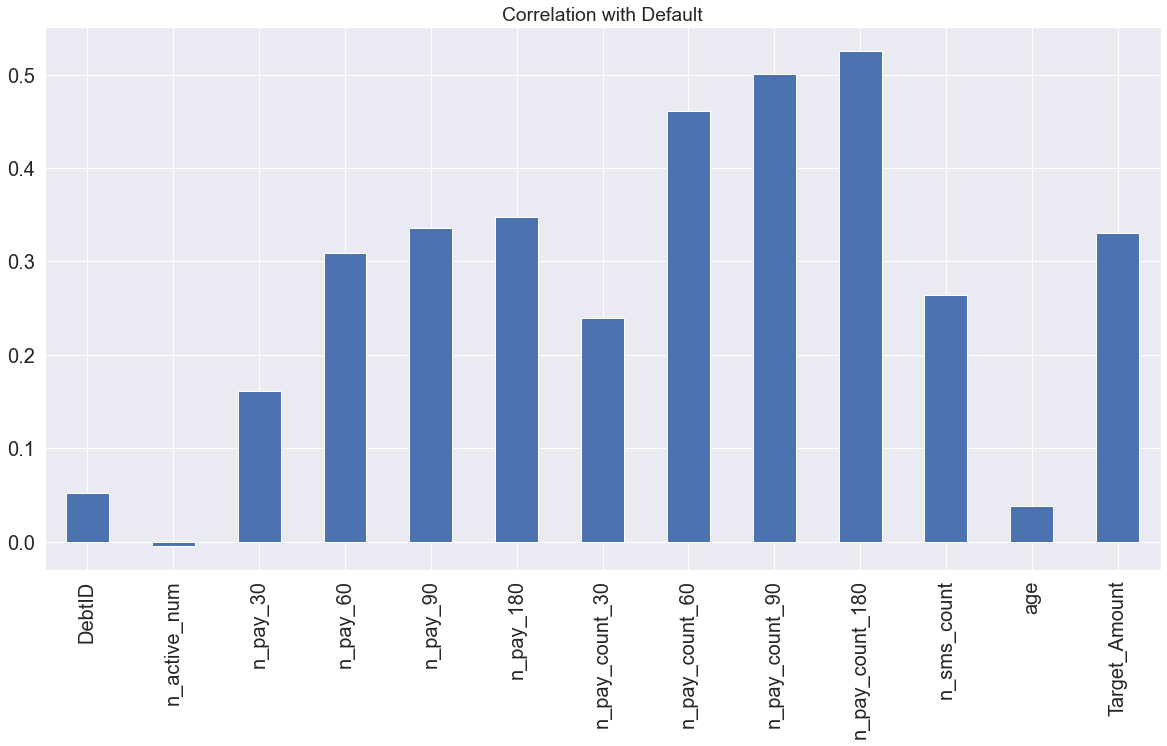

In [30]:
X = df.drop(['Target'],axis=1)
X.corrwith(df['Target']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

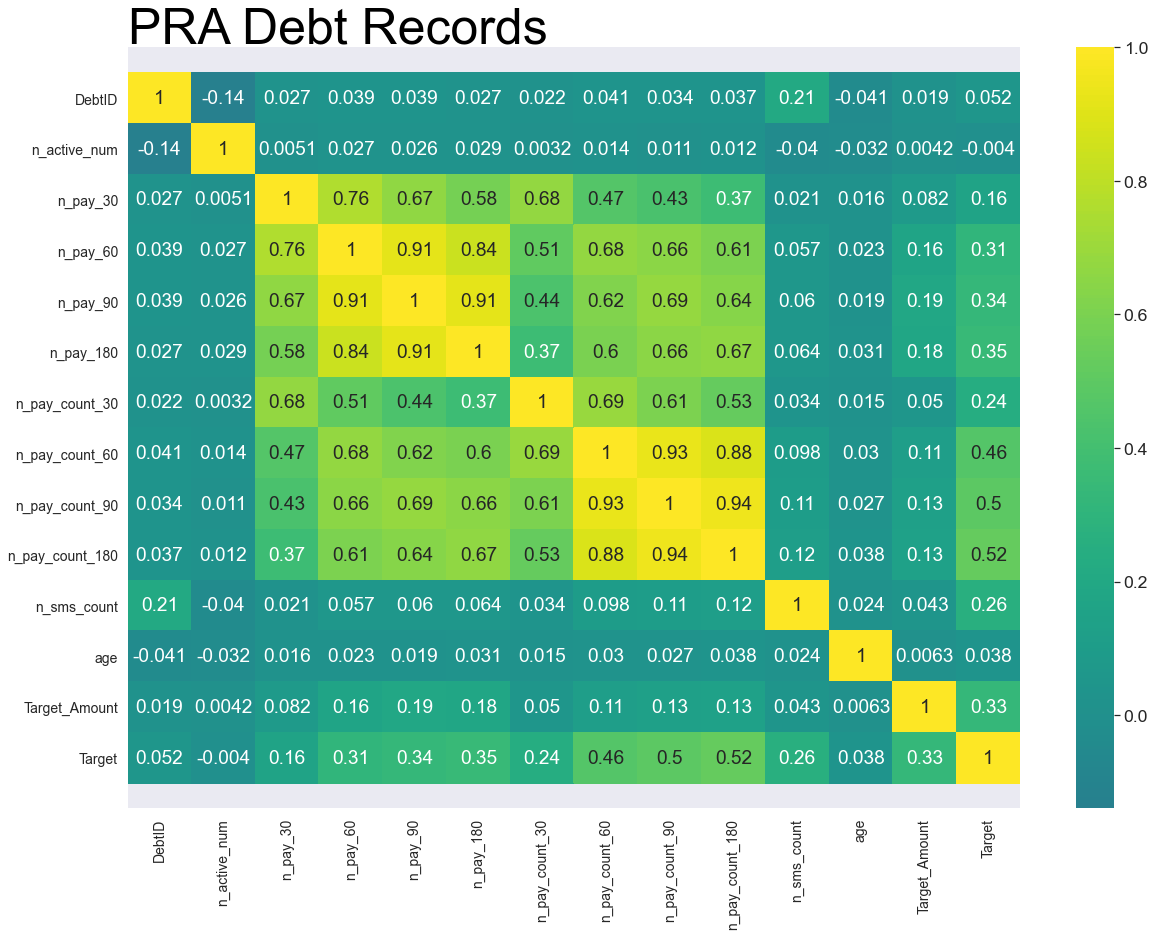

In [31]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "PRA Debt Records ", fontsize = 50, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

### Data Cleaning and Pre-processing 

In [32]:
df['gender'].value_counts()

M    1717
K    1499
N     254
Name: gender, dtype: int64

In [33]:
df = df.loc[df['gender'].isin(['M', 'K', 'N'])]

df['gender'].value_counts(dropna=False)

df['gender'].value_counts(normalize=True, dropna=False)

M    0.494813
K    0.431988
N    0.073199
Name: gender, dtype: float64

In [34]:
# Missing values
df.isna().any()[lambda x: x]

d_payment_order_date    True
d_title_day             True
d_execution_date        True
d_maturity_date         True
dtype: bool

In [35]:
df['d_payment_order_date'].fillna(0, inplace=True)
df['d_title_day'].fillna(0, inplace=True)
df['d_execution_date'].fillna(0, inplace=True)
df['d_maturity_date'].fillna(0, inplace=True)

In [36]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [37]:
df = df.replace({'c_subregion': {'NULL': 0, }})

In [38]:
df.dtypes

DebtID                       int64
VendorName                  object
d_acq_date                  object
n_active_num                 int64
n_pay_30                   float64
n_pay_60                   float64
n_pay_90                   float64
n_pay_180                  float64
n_pay_count_30               int64
n_pay_count_60               int64
n_pay_count_90               int64
n_pay_count_180              int64
c_type_of_portfolio_rap     object
n_sms_count                  int64
d_payment_order_date        object
d_title_day                 object
d_execution_date            object
d_maturity_date             object
gender                      object
age                          int64
Target_Amount              float64
Target                       int64
dtype: object

### One Hot Encoding for Categorical Variables

In [39]:
VendorName_dummies = pd.get_dummies(df['VendorName'], prefix='VendorName', drop_first=True)
c_type_of_portfolio_rap_dummies = pd.get_dummies(df['c_type_of_portfolio_rap'], prefix='rap', drop_first=True)
gender_dummies = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
d_acq_date_dummies = pd.get_dummies(df['d_acq_date'], prefix='acq_date', drop_first=True)
d_payment_order_date_dummies = pd.get_dummies(df['d_payment_order_date'], prefix='paymentOrder', drop_first=True)
d_title_day_dummies = pd.get_dummies(df['d_title_day'], prefix='title_day', drop_first=True)
d_execution_date_dummies = pd.get_dummies(df['d_execution_date'], prefix='execut_date', drop_first=True)
d_maturity_date_dummies = pd.get_dummies(df['d_maturity_date'], prefix='maturity_date', drop_first=True)


In [40]:
df = df.drop(['VendorName','n_active_num','c_type_of_portfolio_rap','gender','d_acq_date','d_payment_order_date','d_title_day','d_execution_date','d_maturity_date'],axis=1)

In [41]:
df = pd.concat([df, VendorName_dummies, c_type_of_portfolio_rap_dummies, gender_dummies,d_acq_date_dummies,d_payment_order_date_dummies,d_title_day_dummies,d_execution_date_dummies,d_maturity_date_dummies], axis=1)

In [42]:
#df['d_acq_date'] = pd.to_datetime(df['d_acq_date'])

In [43]:
#df = df.drop([],axis=1)

In [44]:
# Create features (X) and labels (y)
y = df['Target']
X = df.drop(['Target'], axis=1)

In [45]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) 
print(len(X_train))
print(len(X_test))

2255
1215


In [46]:
sc_X=StandardScaler()
X_train_sc=sc_X.fit_transform(X_train)
X_test_sc=sc_X.transform(X_test)

In [63]:
df.shape

(3470, 4680)

### Classification

#### Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [48]:
# To Predict the Test set results
y_pred = logmodel.predict(X_test)

In [49]:
# Evaluate the model 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred, average="macro"))

[[968   4]
 [ 33 210]]
0.9501420156799507


In [52]:
print("Testing Accuracy for Logistric regression: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Logistric regression: 96.95%


In [51]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       972
           1       0.98      0.86      0.92       243

    accuracy                           0.97      1215
   macro avg       0.97      0.93      0.95      1215
weighted avg       0.97      0.97      0.97      1215


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,968,4,972
1,33,210,243
All,1001,214,1215


### Stratified K Fold Cross Validation - Imbalanced Dataset

In [60]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=LogisticRegression()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

/Users/temismollz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/temismollz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.9838616714697406


/Users/temismollz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
scores

array([1.        , 0.95100865, 0.96541787, 1.        , 1.        ,
       1.        , 0.99711816, 0.95965418, 0.96541787, 1.        ])